## 3.6.2 Using the Second Derivative for Image Sharpening -- The Laplacian

### Example 1: Image sharpening using the Laplacian

The original image shows a slightly blurred image of the North Pole of the moon.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



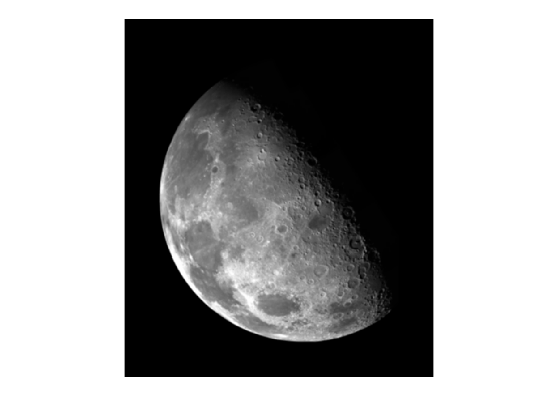

In [4]:
f = imread('Fig0217(a).tif');
imshow(f);

Then we generate the Laplacian filter $w$ and apply it to the input image, $f$, which is of class `uint8`:

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



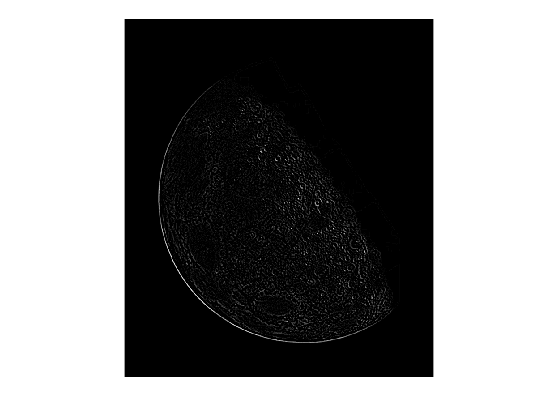

In [6]:
w = fspecial('laplacian', 0);
f1 = im2uint8(f);
g1 = imfilter(f1, w, 'replicate');
figure, imshow(g1, []);

However, $f$ in this case is of class `uint8` and, as discussed in the previous section, `imfilter` gives an output that is of the same class as the input image, so negative values are truncated. We get around this difficulty by converting $f$ to floating point before filtering it:

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



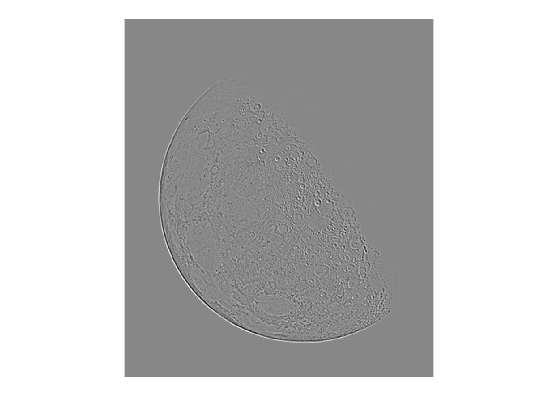

In [8]:
f2 = tofloat(f);
g2 = imfilter(f2, w, 'replicate');

figure, imshow(g2, []);

Finally, we restore the gray tones lost by using the Laplacian by subtracting (because the center coefficient is negative) the Laplacian image from the original image:

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



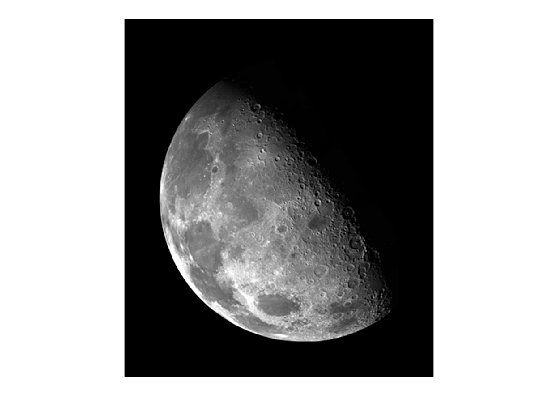

In [9]:
g = f2 - g2;
figure, imshow(g);

### Example 2: Manually specifying filters and comparing enhancement techniques

Usually, sharper enhancement is obtained by using the $3\times 3$ Laplacian filter that has a $-8$ in the center and is surrounded by 1s, as discussed earlier.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



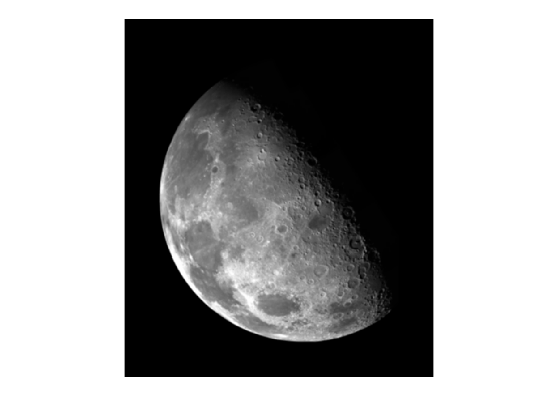

In [14]:
f = imread('Fig0217(a).tif');
f = tofloat(f);
imshow(f);

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



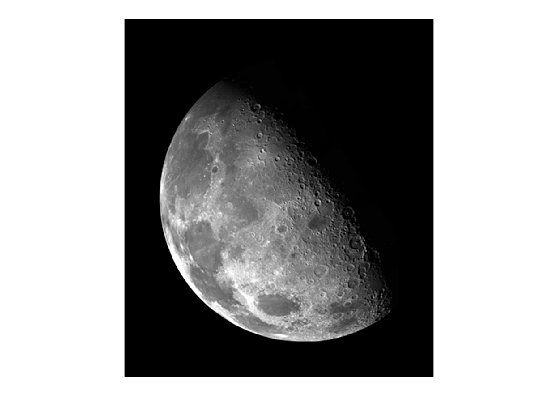

In [15]:
w4 = fspecial('laplacian', 0);
g4 = f - imfilter(f, w4, 'replicate');
figure, imshow(g4);

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



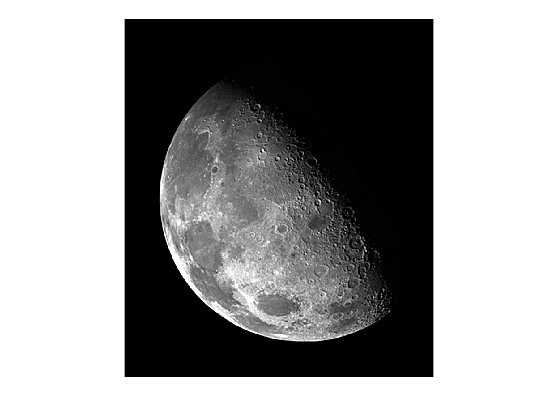

In [16]:
w8 = [1 1 1; 1 -8 1; 1 1 1];
g8 = f - imfilter(f, w8, 'replicate');
figure, imshow(g8);

## 3.6.4 Using First-Order Derivatives for (Nonlinear) Image Sharpening -- The Gradient

### Example 3.17: Use of the gradient for edge enhancement.

The gradient is used frequently in industrial inspection, either to aid humans in the detection of defects or, what is more common. It will be instructive at this point to consider a simple example to show how the gradient can be used to enhance defects and eliminate slowly changing background features. In this example, enhancement is used as a preprocessing step for automated inspection, rather than for human analysis.

The original image shows an optical image of a contact lens, illuminated by a lighting arrangement designed to highlight imperfections, such as the two edge defects in the lens boundary seen at 4 and 5 o'clock.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



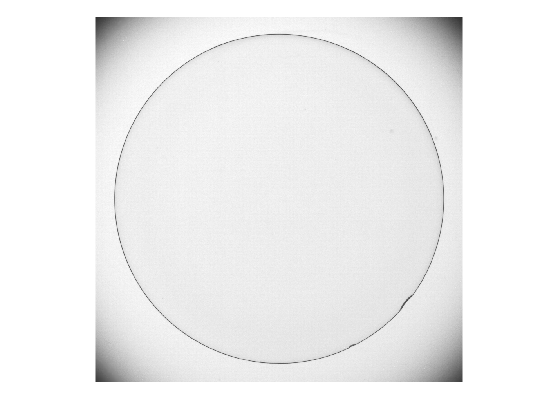

In [23]:
f = imread('Fig0342(a).tif');
f = tofloat(f);
imshow(f);

Then, we generate two $3\times 3$ Sobel filters.

In [41]:
sh = [-1 -2 -1; 0 0 0; 1 2 1]
sv = sh'


sh =

    -1    -2    -1
     0     0     0
     1     2     1


sv =

    -1     0     1
    -2     0     2
    -1     0     1




Next, we use these two Sobel masks to generate gradient image. The edge defects also are quite visible in this image.

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



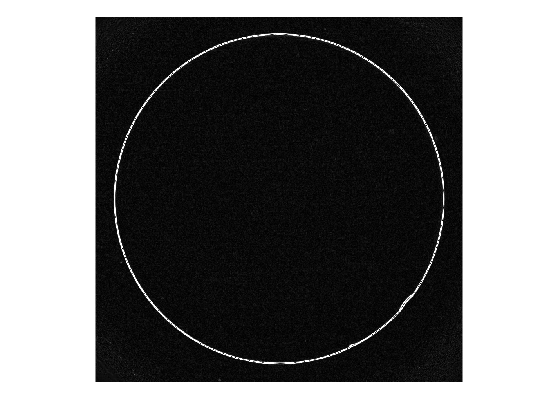

In [43]:
gv = imfilter(f, sv, 'replicate');
gh = imfilter(f, sh, 'replicate');
g = sqrt(gv.^2 + gh.^2);
imshow(g);